In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#read the data as string using open
with open('result.txt') as f:
    data = f.read()
split_data = data.split("------------------------\n")

In [17]:
# find the value of the key, end with \n or space
import re
def find_value(data, key):
    pattern = f"{key}[\:\s]*[\w\.]+"
    string = re.findall(pattern, data)
    r = []
    for s in string:
        r.append(s.replace(key, "").strip())
    return r

In [18]:
#find the index of evaluation
steps = find_value(split_data[1], "step:")
idx = []
i = 0
try:
    while True:
        idx.append(steps.index("500", i, len(steps)))
        i = idx[-1] + 1
except:
    idx = idx[1:]

In [19]:
#find the name of each experiment
experiements = [split_data[i][:split_data[i].find(f"\n")] + \
    find_value(split_data[i], "model:")[0] for i in range(len(split_data))]

In [20]:
experiements

['5-way-1-shot structshot',
 '5-way-5-shot structshot',
 '10-way-1-shot structshot',
 '10-way-5-shot structshot',
 '5-way-1-shot proto',
 '5-way-5-shot proto',
 '10-way-1-shot proto',
 '10-way-5-shot proto',
 '5-way-1-shot nnshot',
 '5-way-5-shot nnshot',
 '10-way-1-shot nnshot',
 '10-way-5-shot nnshot']

In [42]:
#store the result in a dictionary
'''res structure
res
    experiement
        model
        experiment type
        train
            loss
            precision
            recall
            f1
        evaluation
            precision
            recall
            f1
        result
            precision
            recall
            f1
'''
res = {}
for i in range(len(experiements)):
    res[experiements[i]] = {}
    res[experiements[i]]["train"] = {}
    res[experiements[i]]["evaluation"] = {}
    res[experiements[i]]["result"] = {}

    losses = find_value(split_data[i], "loss:")
    precision = find_value(split_data[i], "precision:")
    recall = find_value(split_data[i], "recall:")
    f1 = find_value(split_data[i], "f1:")

    evaluation_precision = []
    evaluation_recall = []
    evaluation_f1 = []

    result_precision = precision.pop(-1)
    result_recall = recall.pop(-1)
    result_f1 = f1.pop(-1)

    for j in reversed(idx):
        evaluation_precision.insert(0, precision.pop(j))
        evaluation_recall.insert(0, recall.pop(j))
        evaluation_f1.insert(0, f1.pop(j))
    
    experiements_type, model = experiements[i].split(" ")
    res[experiements[i]]["model"] = model
    res[experiements[i]]["experiment type"] = experiements_type
    
    res[experiements[i]]["train"]["loss"] = np.array(losses).astype(float)
    res[experiements[i]]["train"]["precision"] = np.array(precision[:-1]).astype(float)
    res[experiements[i]]["train"]["recall"] = np.array(recall[:-1]).astype(float)
    res[experiements[i]]["train"]["f1"] = np.array(f1[:-1]).astype(float)

    res[experiements[i]]["evaluation"]["precision"] = np.array(evaluation_precision).astype(float)
    res[experiements[i]]["evaluation"]["recall"] = np.array(evaluation_recall).astype(float)
    res[experiements[i]]["evaluation"]["f1"] = np.array(evaluation_f1).astype(float)

    res[experiements[i]]["result"]["precision"] = float(result_precision)
    res[experiements[i]]["result"]["recall"] = float(result_recall)
    res[experiements[i]]["result"]["f1"] = float(result_f1)


In [43]:
def plot_res(experiements_type: str, metric: str, model: str, mode: str):
    plt.figure(figsize=(10, 6))
    if model == "all" and experiements_type == "all":
        for i in range(len(experiements)):
            plt.plot(res[experiements[i]][mode][metric], label=experiements[i])
    elif model == "all":
        for i in range(len(experiements)):
            if res[experiements[i]]["experiment type"] == experiements_type:
                plt.plot(res[experiements[i]][mode][metric], label=experiements[i])
    elif experiements_type == "all":
        for i in range(len(experiements)):
            if res[experiements[i]]["model"] == model:
                plt.plot(res[experiements[i]][mode][metric], label=experiements[i])
    
    else:
        for i in range(len(experiements)):
            if res[experiements[i]]["model"] == model and res[experiements[i]]["experiment type"] == experiements_type:
                plt.plot(res[experiements[i]][mode][metric], label=experiements[i])

    plt.xlabel("step")
    plt.ylabel(metric)
    plt.legend()
    plt.title(experiements_type + " " + model + " " + metric) 
    plt.show()

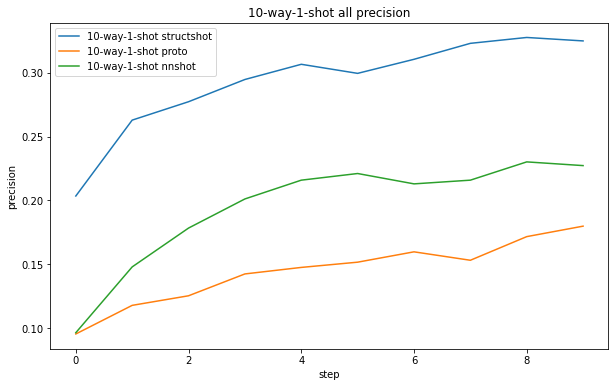

In [57]:
plot_res(experiements_type="10-way-1-shot", metric="precision", model="all", mode = "evaluation")